<center><h1> Projeto de Machine Learning </h1><center>
<center><h1>Previsão de Chuvas na Austrália</h1><center>

------------------------------------------------
<center>Eduardo Selber, Henrique Badin e Luca Caruso<center>

# Introdução

O clima exerce uma forte influência em diversas atividades humanas, desde a agricultura até o cotidiano das pessoas. Com o avanço das tecnologias, novas ferramentas de análise e previsão climática têm sido desenvolvidas. No entanto, prever chuvas de forma precisa, especialmente em regiões com grandes variações climáticas, como a Austrália, ainda representa um grande desafio.

A previsão de chuvas depende de uma complexa interação entre fatores atmosféricos, padrões de vento e características regionais. Isso torna a modelagem climática uma ferramenta essencial, não apenas para a agricultura, onde a distribuição das chuvas impacta as colheitas, mas também em outros setores da sociedade, como por exemplo na gestão de recursos hídricos, que são fundamentais para garantir o abastecimento de água em regiões propensas à seca.

Diante desse cenário, o presente estudo tem como objetivo analisar as variáveis que afetam a ocorrência de chuvas na Austrália e desenvolver um modelo de Machine Learning capaz de prever se irá chover no dia seguinte. Para isso, utilizaremos um conjunto de dados que contém informações meteorológicas coletadas em diversas estações de medição distribuídas pelo território australiano ao longo dos anos.

# Preparando o ambiente

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
import os


# EDA - Exploratory Data Analysis

Leitura dos dados e análise inicial

In [2]:
# Verificando o diretório atual
current_directory = os.getcwd()
# Listando os arquivos no diretório de dados
data_directory = os.path.join(current_directory, '..', 'data')

# Carregando o dataset
df = pd.read_csv(os.path.join(data_directory, 'weatherAUS.csv'))
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Analisando os tipos de dados das colunas do dataset e tamanho do dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analisando os tipos de dados identificamos que os dados se dividem em **duas categorias**:
- **Categóricos** -  Identificados pelo tipo ***object**
- **Numéricos** - Identificados pelo tipo **float64**

O Dataset também conta com **145460** linhas e **23 colunas**, sendo elas:
- **Date** - A data da observação (formato: yyyy-mm-dd)
- **Location** - A localização da estação meteorológica (Nome da cidade - string)
- **MinTemp** - A temperatura mínima em graus Celsius (float)
- **MaxTemp** - A temperatura máxima em graus Celsius  (float)
- **Rainfall** - A quantidade de chuva medida em mm (float)
- **Evaporation** - A taxa de evaporação medida em mm (float)
- **Sunshine** - O número de horas de sol (float)
- **WindGustDir** - A direção da rajada de vento mais forte (string)
- **WindGustSpeed** - A velocidade (em km/h) da rajada de vento mais forte (float)
- **WindDir9am** - A direção do vento às 9am (string)
- **WindDir3pm** - A direção do vento às 3pm (string)
- **WindSpeed9am** - A velocidade do vento às 9am (em km/h) (float)
- **WindSpeed3pm** - A velocidade do vento às 3pm (em km/h) (float)
- **Humidity9am** - A umidade relativa às 9am (em %) (float)
- **Humidity3pm** - A umidade relativa às 3pm (em %) (float)
- **Pressure9am** - A pressão atmosférica reduzida ao nível do mar às 9am (em hpa) (float)
- **Pressure3pm** - A pressão atmosférica reduzida ao nível do mar às 3pm (em hpa) (float)
- **Cloud9am** - A fração de cobertura de nuvens às 9am (em oitavos) (float)
- **Cloud3pm** - A fração de cobertura de nuvens às 3pm (em oitavos) (float)
- **Temp9am** - A temperatura às 9am em graus Celsius (float)
- **Temp3pm** - A temperatura às 3pm em graus Celsius (float)
- **RainToday** - Se choveu (precipitação acima de 1mm) ou não (string)
- **RainTomorrow** - A variável alvo. Se choverá ou não amanhã (string)

### Analisando dados vazios no dataset

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Como podemos ver, com exceção da *Data* e da *Localização* todos os dados apresentam uma quantidade significativa de dados ausentes. É necessário analisar individualmente cada um deles para entender qual o tratamento apropriado

### Analisando métricas estatísticas dos dados

In [5]:
# Verificando as métricas do dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


## Visualizando a distribução dos dados
#### Variáveis Numéricas

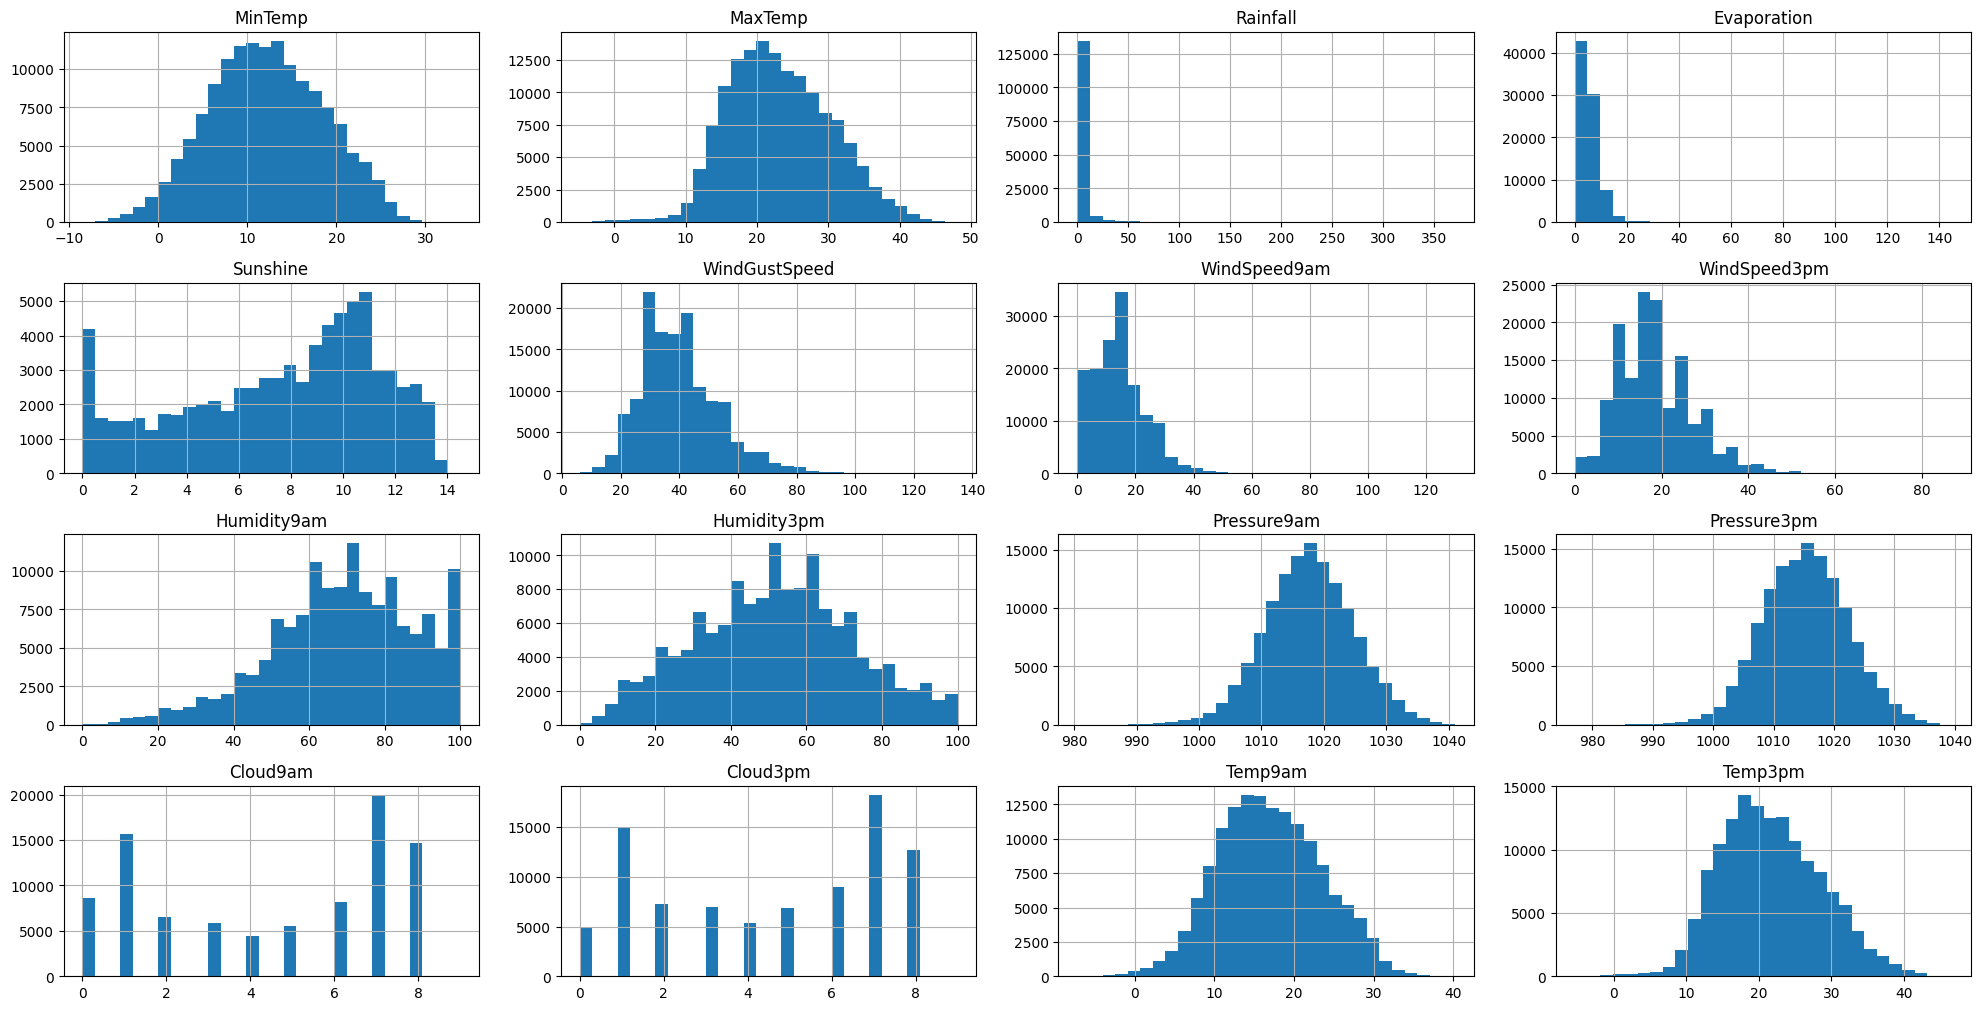

In [6]:
# Distribuição das variáveis numéricas
df.hist(bins=30, figsize=(20, 15), layout=(6, 4))
plt.tight_layout()
plt.show()

#### Variáveis Categóricas

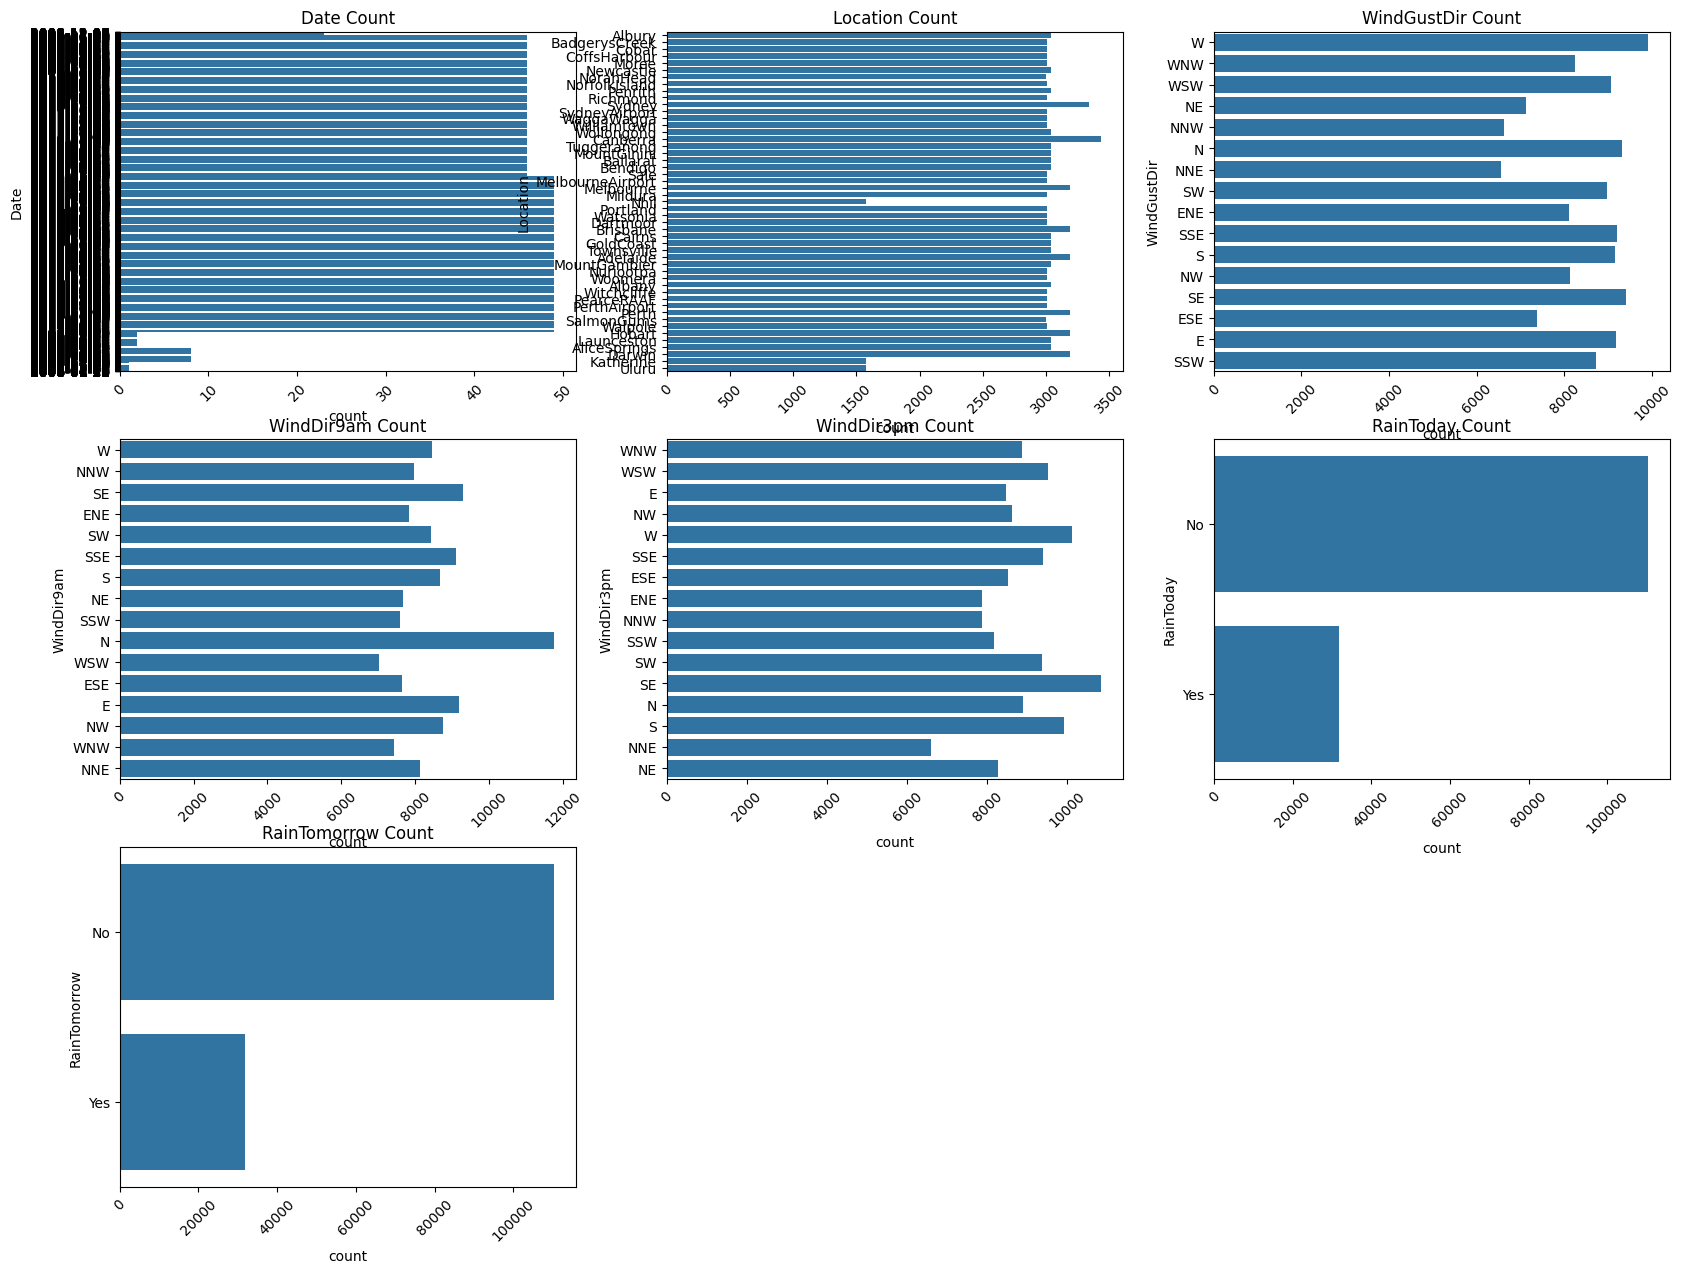

In [7]:
# Contagem das variáveis categóricas do DataFrame
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include='object').columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, y=column)
    plt.title(f'{column} Count')
    plt.xticks(rotation=45)

## Analisando as variáveis Categóricas

#### Location

In [8]:
print("Locais do Dataset: {}\n".format(df.Location.unique()))
print("Locais diferentes no Dataset: {}\n".format(df.Location.nunique()))
print("Quantidade de vezes que cada cidade aparece no Dataset: {}".format(df.Location.value_counts()))

Locais do Dataset: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Locais diferentes no Dataset: 49

Quantidade de vezes que cada cidade aparece no Dataset: Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040


A Austrália é um país de clima diversificado, com regiões que variam de desérticas a tropicais. A localização das estações meteorológicas é um fator importante a ser considerado, pois a distribuição das chuvas pode variar significativamente de uma região para outra. Dessa forma, a localização geográfica pode ser um fator determinante para a ocorrência de chuvas. Portanto, criou-se uma coluna binária que classifica as regiões de acordo com a zona climática a que pertencem, onde são atribuidos valores de 1, para regiões que pertencem a zonas chuvosas, ou 0, caso o contrário.

![Zonas climaticas da Australia](../imgs/zonas.png)

In [9]:
import pandas as pd
zona_chuvosa_map = {
    'Albury': 0, 'BadgerysCreek': 0, 'Cobar': 0, 'CoffsHarbour': 1, 'Moree': 0, 
    'Newcastle': 1, 'NorahHead': 1, 'NorfolkIsland': 1, 'Penrith': 0, 'Richmond': 0, 
    'Sydney': 1, 'SydneyAirport': 0, 'WaggaWagga': 0, 'Williamtown': 0, 'Wollongong': 1, 
    'Canberra': 0, 'Tuggeranong': 0, 'MountGinini': 1, 'Ballarat': 0, 'Bendigo': 0, 
    'Sale': 0, 'MelbourneAirport': 0, 'Melbourne': 0, 'Mildura': 0, 'Nhil': 0, 
    'Portland': 0, 'Watsonia': 0, 'Dartmoor': 0, 'Brisbane': 1, 'Cairns': 1, 
    'GoldCoast': 1, 'Townsville': 1, 'Adelaide': 0, 'MountGambier': 0, 'Nuriootpa': 0, 
    'Woomera': 0, 'Albany': 0, 'Witchcliffe': 0, 'PearceRAAF': 0, 'PerthAirport': 0, 
    'Perth': 0, 'SalmonGums': 0, 'Walpole': 0, 'Hobart': 1, 'Launceston': 1, 
    'AliceSprings': 0, 'Darwin': 1, 'Katherine': 1, 'Uluru': 0
}

# Adicionando a coluna 'zona_chuvosa' ao DataFrame
df['zona_chuvosa'] = df['Location'].map(zona_chuvosa_map)

# Exibindo as primeiras linhas do DataFrame após a alteração
print(df.head())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1   

### Analisando o comportamento da variável WindGustDir

In [10]:
print("Direções do Dataset: {}\n".format(df.WindGustDir.unique()))
print("Direções diferentes no Dataset: {}\n".format(df.WindGustDir.nunique()))
print("Quantidade de vezes que cada direção aparece no Dataset: {}".format(df.WindGustDir.value_counts()))

Direções do Dataset: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

Direções diferentes no Dataset: 16

Quantidade de vezes que cada direção aparece no Dataset: WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64


## Visualizando Outliers com boxplots

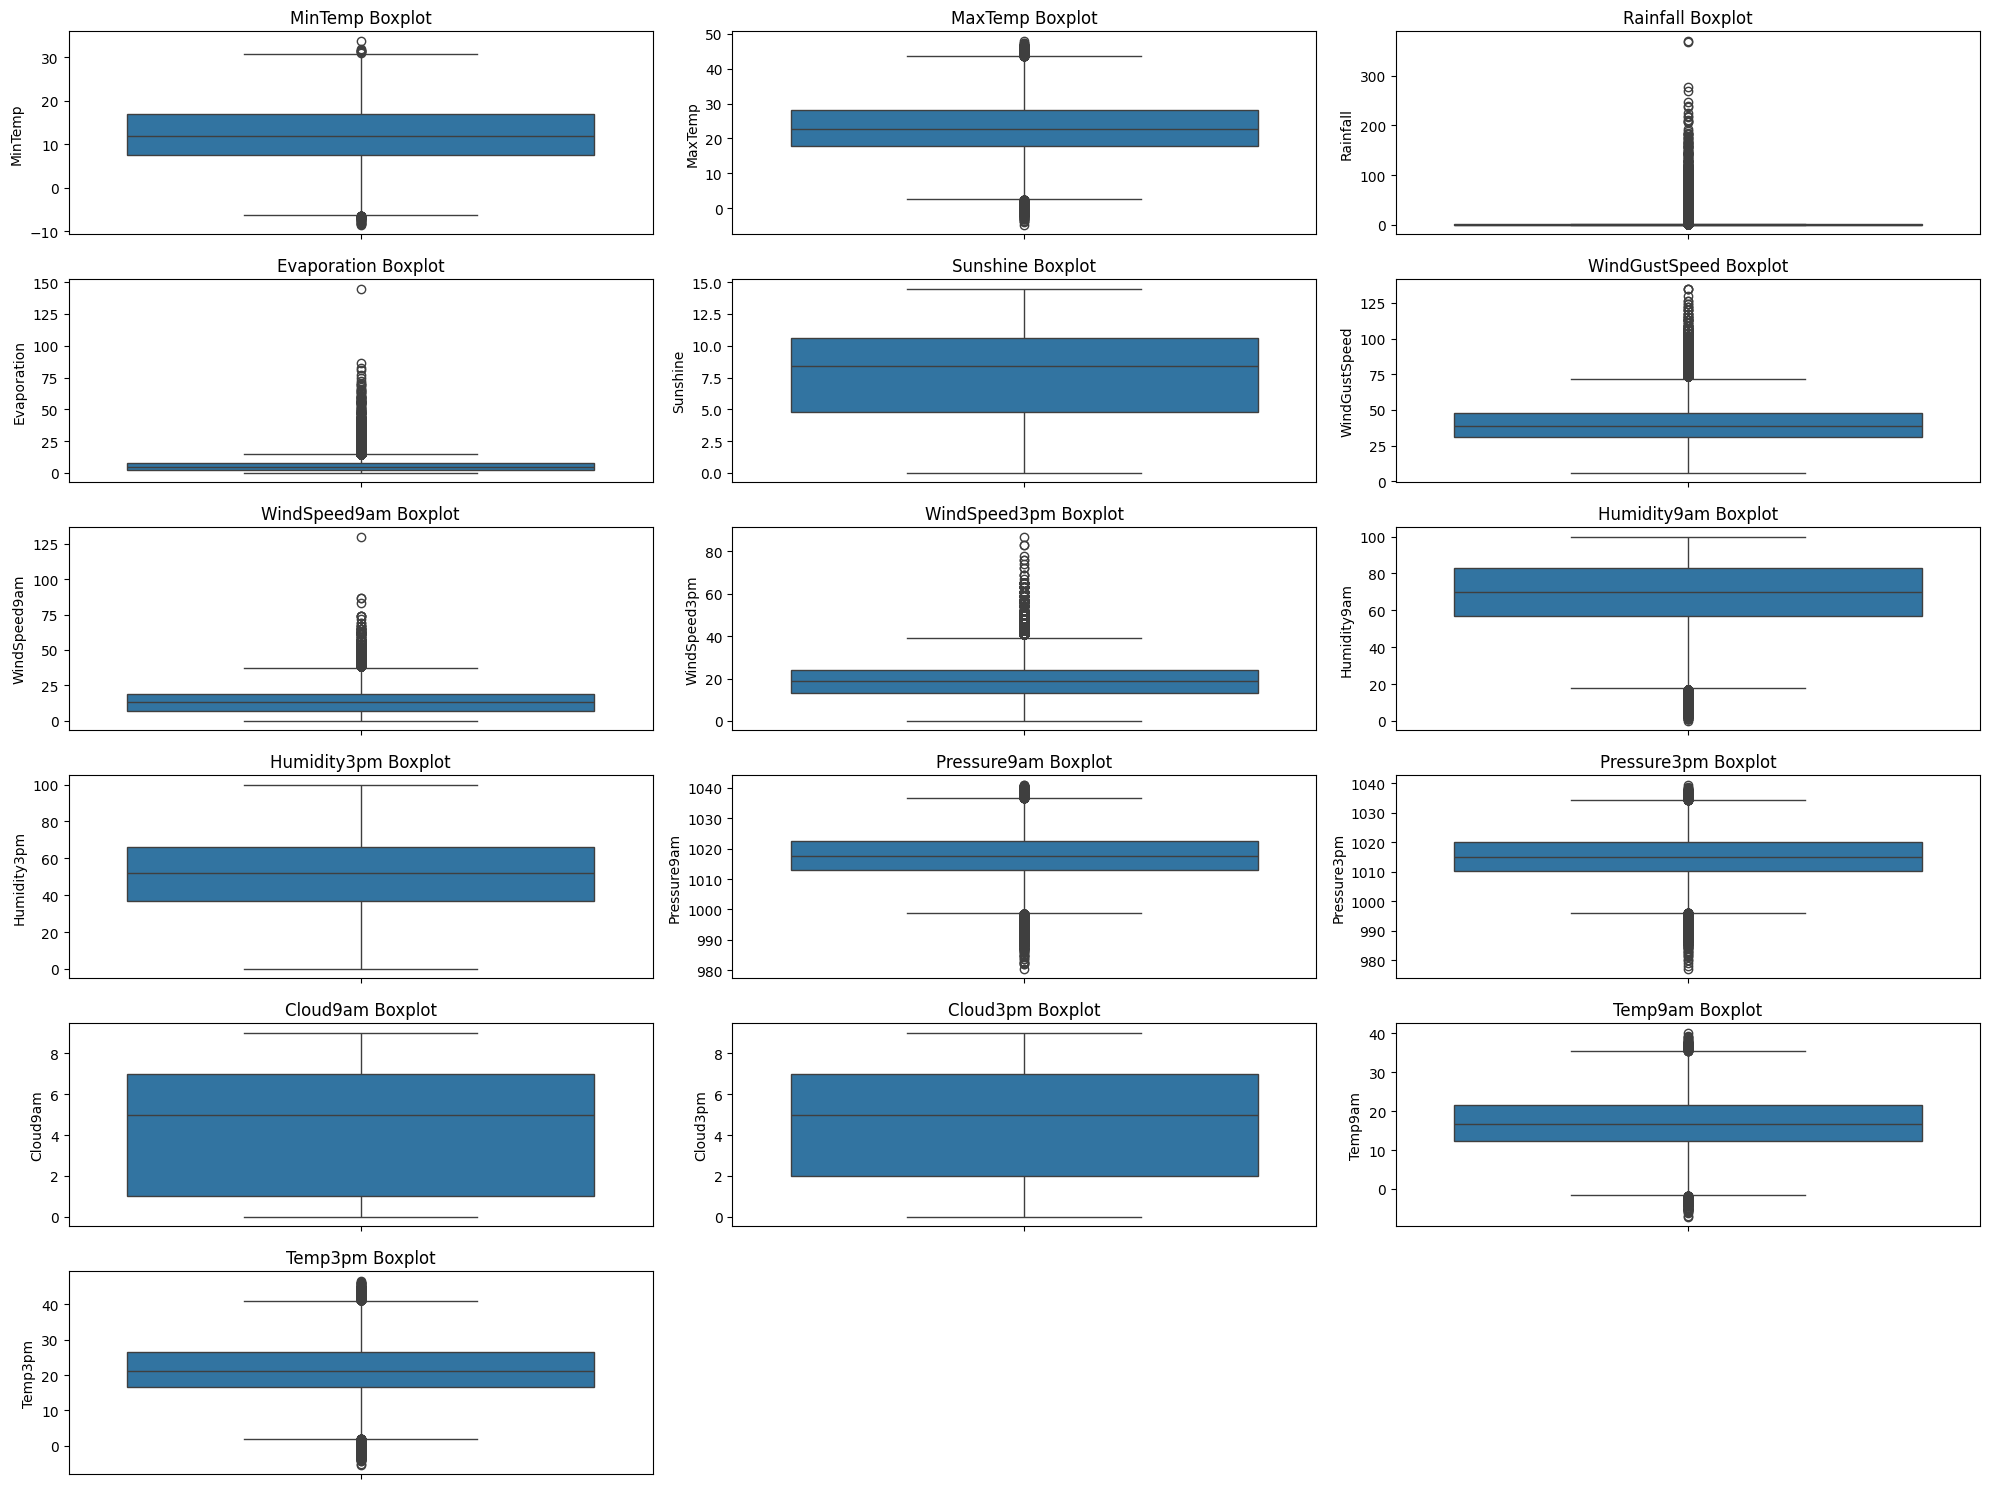

In [11]:
plt.figure(figsize=(20, 15))
num_columns = len(df.select_dtypes(include='float64').columns)
rows = (num_columns // 3) + 1

for i, column in enumerate(df.select_dtypes(include='float64').columns, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

## Data Wrangling
Primeiro vamos formatar os dados da base de dados para prepará-lo para o modelo preditivo

## Tratamento dos dados vazios
### Dados Numéricos

In [12]:
#Visualizando as colunas numericas do dataset
numerical = [i for i in df.columns if df[i].dtype=='float64']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

Para fazer o tratamento das colunas **MinTemp**, **MaxTemp**, **Humidity9am**, **Humidity3pm**, **Pressure9am**, **Pressure3pm**, **Temp9am**, **Temp3pm**, vamos substituir os dados ausentes pela média, uma vez que os dados apresentam uma distribuição normal.

In [13]:
#Substituindo os valores nulos pela média da coluna das colunas MinTemp, MaxTemp, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

Para as colunas **Rainfall**, **Evaporation**, **Sunshine**, **WindGustSpeed**, **WindSpeed9am**, **WindSpeed3pm** vamos substituir os valores nulos pela mediana da coluna, já que os dados destes apresentam uma distribuição assimétrica

In [14]:
#Substituindo os valores nulos pela mediana da coluna das colunas WindGustSpeed, WindSpeed9am, WindSpeed3pm, Evaporation, Sunshine e Rainfall
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].median())

Por fim, para as colunas **Cloud9am** e **Cloud3pm**, vamos substituir os valores vazios pela moda, uma vez que seus dados se apresentam discretos

In [15]:
#Substituindo os valores nulos pela moda da coluna das colunas cloud9am e cloud3pm
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])

### Dados Categóricos

As **Localizações** não apresentam dados vazios e portanto não precisam de tratamento. 
Para as colunas **WindGustDir**, **WindDir9am**, **WindDir3pm**, **RainToday** e **RainTomorrow** vamos substituir os valores vazios pelo valor mais frequente

In [16]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

C:\Users\henri\AppData\Local\Temp\ipykernel_22388\3401736357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
C:\Users\henri\AppData\Local\Temp\ipykernel_22388\3401736357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Feito este tratamento, não deve haver mais dados vazios no dataset

In [17]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
zona_chuvosa     0
dtype: int64

Agora que não há mais dados ausentes, podemos ajustar os dados para que eles possam ser usados nos modelos preditivos.
A primeira coisa a ser feita é o mapeamento de colunas categóricas binárias (Sim e Não) para os valores 1 e 0 respectivamente.
Isso deverá ser feito nas colunas **RainToday** e **RainTomorrow**


In [18]:
# #Tratamento de variaveis categoricas 
df["RainToday"] = df["RainToday"].map({"Yes":1, "No":0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

Além disso, para as demais colunas categóricas precisamos codificar os dados.
Podemos começar separando as datas em 3 colunas numéricas representando **Dia**, **Mês** e **Ano** 

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date', axis=1, inplace=True)  #Não precisamos mais da coluna Date uma vez que já extraímos as informações dela para outras colunas e o dataset está ordenado por data

Para as demais colunas categóricas vamos codificar usando a função **Label Encoder** do sklearn que transforma os valores categóricos em um número inteiro que representa aquele valor categorico

In [20]:
le =  LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])
    else:
        continue

Agora que todos os dados foram formatados, como podemos ver abaixo, não há mais o tipo *object* dentre as colunas

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 145460 entries, 45587 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-null

Agora que não temos mais dados categóricos, podemos analisar a correlação entre as variáveis

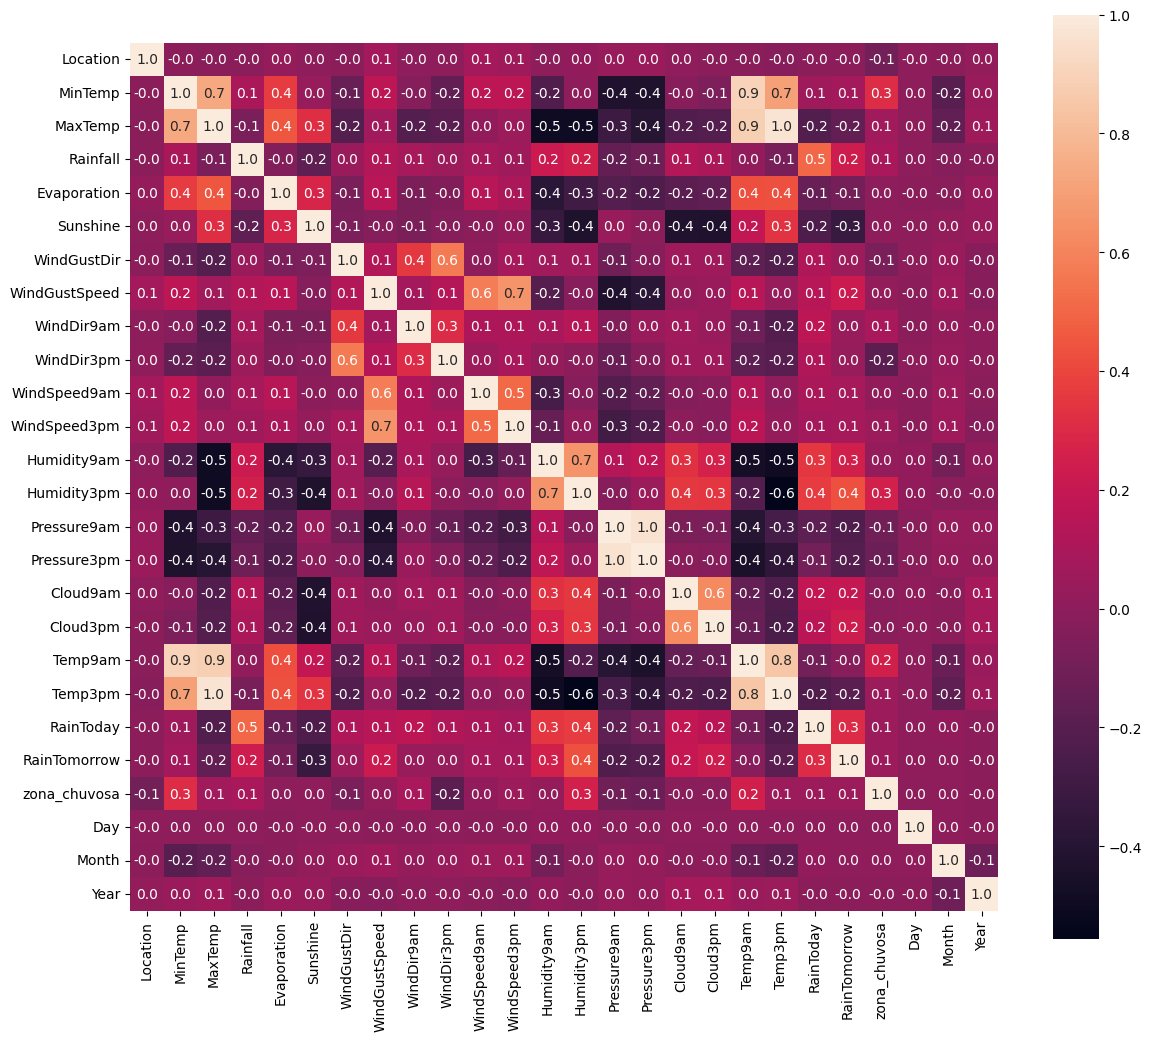

In [22]:
corr = df.corr()
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.1f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

## Dividindo o Dataset em Test e Train

Como vimos nos histogramas da analise exploratória, o nosso target não está balanceado.
Por isso, a primeira coisa que devemos fazer é o balanceamento de choveu e não choveu das colunas **RainToday** e **RainTomorrow**, para que isso não gere um viés na nossa predição

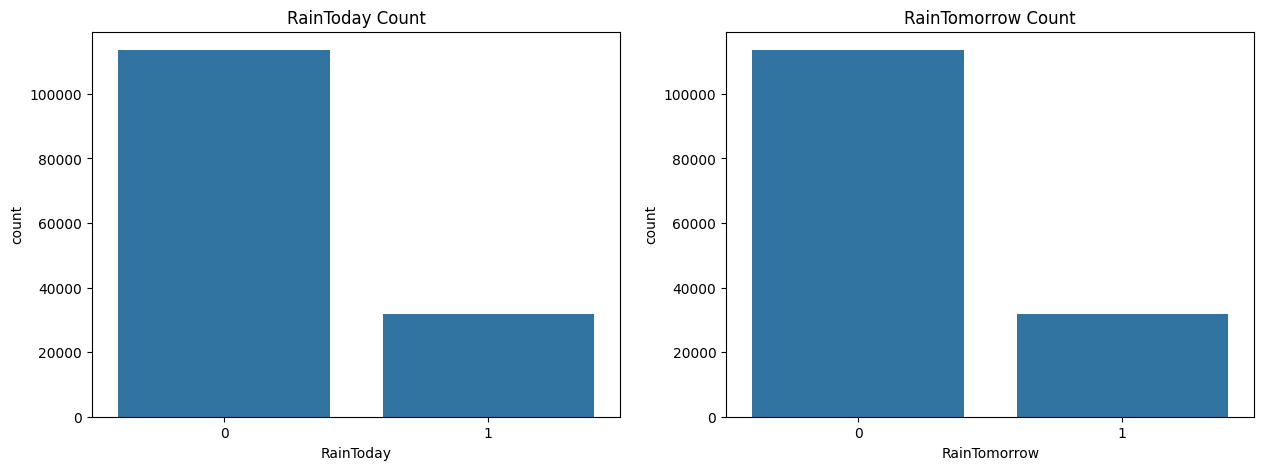

In [23]:
#Distrubuição das colunas RainToday e RainTomorrow
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)    
sns.countplot(data=df, x='RainToday')
plt.title('RainToday Count')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='RainTomorrow')
plt.title('RainTomorrow Count')
plt.show()

In [24]:
dataset = df.copy()
target = dataset["RainTomorrow"]
features = dataset.drop(["RainTomorrow"], axis=1)

Para fazer o balanceamento das classes, vamos usar a técnica de oversampling **SMOTE** (Synthetic Minority Over Sampling Technique), que cria novas instâncias da classe minoritária a partir das instâncias já existentes, combinada com a técnica de **undersampling**, que remove instâncias da classe majoritária, podemos balancear as classes do dataset.

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#x_res, y_res = smk.fit_resample(features, target)
x_res = features
y_res = target

# Separando o DataFrame em treino, teste e validação
n = len(df)
train_end = int(0.6 * n)
test_end = int(0.8 * n)


# Dividindo os dados em treino (60%) e o restante (40% para teste + validação)
x_train, x_remainder, y_train, y_remainder = train_test_split(
    x_res, y_res, test_size=0.4, random_state=42
)

# Dividindo o restante (40%) em teste (20%) e validação (20%)
x_test, x_val, y_test, y_val = train_test_split(
    x_remainder, y_remainder, test_size=0.5, random_state=42
)

# Verificando os tamanhos finais
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


((87276, 25), (87276,), (29092, 25), (29092,), (29092, 25), (29092,))

In [26]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,zona_chuvosa,Day,Month,Year
70190,18,16.9,21.5,2.4,9.8,5.3,12,41.0,13,11,...,1011.600000,8.0,7.0,17.3,20.4,1,0,5,12,2016
130166,15,11.3,15.7,0.0,0.6,0.0,6,43.0,3,3,...,1018.200000,7.0,7.0,13.1,15.0,0,1,25,5,2009
94198,39,11.3,26.2,0.0,3.0,9.1,4,26.0,3,3,...,1016.700000,3.0,7.0,19.3,24.8,0,1,7,7,2011
39332,42,12.4,32.3,0.0,8.4,8.4,13,54.0,3,14,...,1009.700000,7.0,8.0,22.5,30.1,0,0,2,12,2016
24820,30,12.5,22.0,5.6,4.8,8.4,8,31.0,11,10,...,1015.255889,7.0,7.0,17.2,19.8,1,0,25,10,2010


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
model = LogisticRegression(max_iter=10000, tol=1e-5)
model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=10000, tol=1e-05)

## Validando o modelo com os dados separados para validação

Primeiramente, observou-se qual era a distribuição de 1 e 0 nos dados de validação, para compreender qual acurácia o modelo teria se chutasse sempre 0 ou sempre 1

In [28]:
pd.Series(y_val).value_counts(normalize=True)

RainTomorrow
0    0.781143
1    0.218857
Name: proportion, dtype: float64

Preveu-se então o modelo com os dados de validação e calculou-se a acurácia do modelo

In [29]:
y_pred = model.predict(scaler.transform(x_val))


In [30]:
accuracy = accuracy_score(y_val, y_pred)

print(f"{accuracy:.3f}")

0.844


O resultado foi uma acurácia de **0.84**. Feito isso, podemos agora prever os dados de teste.

## Previsão dos dados de teste

Seguimos então para a previsão dos dados de teste seguindo o mesmo procedimento que fizemos com os dados de validação.

In [31]:
pd.Series(y_test).value_counts(normalize=True)

RainTomorrow
0    0.776468
1    0.223532
Name: proportion, dtype: float64

In [32]:
y_test_pred = model.predict(scaler.transform(x_test))


In [33]:
accuracy = accuracy_score(y_test, y_test_pred)

print(f"{accuracy:.3f}")

0.843


Obteve-se uma acurácia de **0.84** nos dados de teste, assim como nos de validação, o que indica que o modelo está generalizando bem

Para observarmos melhor os resultados, vamos plotar uma distribuição com os resultados obtidos

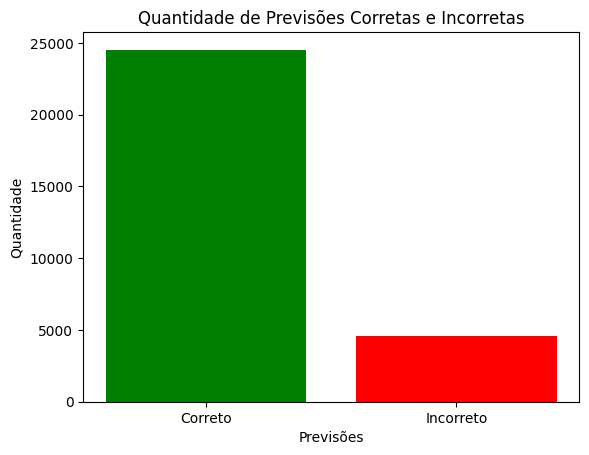

Acurácia: 84.28777670837344%


In [34]:
import matplotlib.pyplot as plt

# Contagem de corretos e incorretos
certo = 0
total = 0
for i in range(len(y_test_pred)):
    if y_test_pred[i] == y_test.iloc[i]:
        certo += 1
    total += 1

errado = total - certo

# Dados para o gráfico
labels = ['Correto', 'Incorreto']
values = [certo, errado]

# Criando o gráfico de barras
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Previsões')
plt.ylabel('Quantidade')
plt.title('Quantidade de Previsões Corretas e Incorretas')
plt.show()
print(f'Acurácia: {certo/total*100}%')

## Busca por um modelo com melhor acurácia

Feito o modelo inicial, agora vamos tentar melhorar a acurácia do modelo. Para isso, testaremos diferentes modelos de classificação e diferentes hiperparâmetros para cada modelo.

Testou-se diversos modelos de classificação para tentar encontrar um com uma acurácia maior que a obtida com o modelo de Regressão Logística padrão que foi usado anteriormente. Os modelos testados foram:

- **Random Forest**
- **GradientBoostingClassifier**
- **LogisticRegression**
- **KNeighborsClassifier**

Para cada um dos modelos foram observados os f1 scores das acurácias de cada um deles para decidir qual o melhor modelo.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler  # Biblioteca para balanceamento

# Reamostragem da classe minoritária
ros = RandomOverSampler(sampling_strategy='minority')
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Modelos a serem testados
modelos = {
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "RandomForest_balanced": RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced"),
    "GradientBoosting_balanced": GradientBoostingClassifier(n_estimators=100),
    "LogisticRegression_balanced": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "LogisticRegression": LogisticRegression(max_iter=1000, tol=1e-5),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Função para treinar e avaliar os modelos
def treinar_e_avaliar(modelo, x_train, y_train, x_val, y_val):
    # Definir o pipeline completo com o modelo atual
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", modelo)
    ])
    
    # Treinamento e predição
    pipeline.fit(x_train, y_train)
    y_val_pred = pipeline.predict(x_val)
    
    # Avaliar as métricas
    print("Matriz de Confusão:")
    print(confusion_matrix(y_val, y_val_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_val, y_val_pred))
    print("\nAcurácia:", accuracy_score(y_val, y_val_pred))

# Treinar e avaliar cada modelo
for nome, modelo in modelos.items():
    print(f"\nModelo: {nome}")
    treinar_e_avaliar(modelo, x_resampled, y_resampled, x_val, y_val)



Modelo: RandomForest
Matriz de Confusão:
[[18622  4103]
 [ 1592  4775]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     22725
           1       0.54      0.75      0.63      6367

    accuracy                           0.80     29092
   macro avg       0.73      0.78      0.75     29092
weighted avg       0.84      0.80      0.81     29092


Acurácia: 0.8042417159356524

Modelo: RandomForest_balanced
Matriz de Confusão:
[[18628  4097]
 [ 1612  4755]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     22725
           1       0.54      0.75      0.62      6367

    accuracy                           0.80     29092
   macro avg       0.73      0.78      0.75     29092
weighted avg       0.84      0.80      0.81     29092


Acurácia: 0.8037604839818506

Modelo: GradientBoosting_balanced
Matriz de Confusão:
[[18170  4555]
 [ 

Como pudemos observar, o modelo de Random Forest Classifier padrão, sem balanceamento de classes, obteve o melhor score por uma pequena margem. Portanto, para prosseguir com a análise, vamos usar o modelo de Random Forest Classifier e analisar quais os melhores hiperparâmetros para ele.

## Otimização de Hiperparâmetros

Para otimizar os hiperparâmetros do modelo, vamos usar a técnica de **GridSearchCV** que testa diferentes combinações de hiperparâmetros e retorna a melhor combinação.

In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# Ignorar warnings
warnings.filterwarnings("ignore")

def grid_search_rf(x_train, y_train, x_val, y_val, n_estimators_list, class_weight_options, max_depth_list):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_val_scaled = scaler.transform(x_val)

    best_score = 0
    best_params = None

    # Gerar todas as combinações de parâmetros
    param_combinations = [(n, cw, md) for n in n_estimators_list for cw in class_weight_options for md in max_depth_list]

    print(f"Iniciando busca com {len(param_combinations)} combinações de parâmetros...")
    with tqdm(total=len(param_combinations), desc="Progresso") as pbar:
        for n_estimators, class_weight, max_depth in param_combinations:
            try:
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    class_weight=class_weight,
                    max_depth=max_depth,
                    random_state=42
                )

                model.fit(x_train_scaled, y_train)

                y_pred = model.predict(x_val_scaled)
                score = accuracy_score(y_val, y_pred)

                # Atualizar a melhor acurácia e os melhores parâmetros
                if score > best_score:
                    best_score = score
                    best_params = {
                        "n_estimators": n_estimators,
                        "class_weight": class_weight,
                        "max_depth": max_depth
                    }
            except Exception as e:
                print(f"Erro com parâmetros n_estimators={n_estimators}, class_weight={class_weight}, max_depth={max_depth}: {e}")
            
            pbar.update(1)

    print("\nBusca finalizada.")
    print(f"Melhor acurácia: {best_score:.2f} com {best_params}")
    return best_score, best_params

# Exemplo de uso
n_estimators_list = [200, 300, 500, 1000, 1500]
class_weight_options = [None, 'balanced', 'balanced_subsample']
max_depth_list = [5, 10, 20, None]

best_score, best_params = grid_search_rf(x_train, y_train, x_val, y_val, n_estimators_list, class_weight_options, max_depth_list)


Iniciando busca com 60 combinações de parâmetros...


Progresso: 100%|██████████| 60/60 [1:29:33<00:00, 89.56s/it] 


Busca finalizada.
Melhor acurácia: 0.86 com {'n_estimators': 1500, 'class_weight': None, 'max_depth': None}


Após analisar os scores de acurácia, o modelo de regressão logística não balanceado com 1500 estimadores obteve o melhor score de acurácia, com um valor de 0.86

## Treinar o modelo com os melhores parâmetros
Agora que temos os melhores parâmetros (n_estimators=1500, class_weight=None, max_depth=None), vamos treinar o modelo de Random Forest com esses valores.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir o modelo com os parâmetros otimizados
modelo_otimizado = RandomForestClassifier(
    n_estimators=1500,
    class_weight=None,
    max_depth=None,
    random_state=42
)

# Criar o pipeline com escalonamento e o modelo otimizado
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", modelo_otimizado)
])

# Treinar o modelo
pipeline.fit(x_train, y_train)

# Fazer as previsões no conjunto de validação
y_val_pred = pipeline.predict(x_val)

# Avaliar a acurácia
acuracia = accuracy_score(y_val, y_val_pred)
print("Acurácia no conjunto de validação:", acuracia)

Acurácia no conjunto de validação: 0.858036573628489


## Avaliar o modelo com métricas adicionais
Além da acurácia, é importante verificar outras métricas, como o F1-score, precisão e recall. Vamos também exibir a matriz de confusão para entender como o modelo está classificando as classes.

In [38]:
# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_val, y_val_pred))

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_val, y_val_pred))

# Acurácia
print("\nAcurácia:", acuracia)


Matriz de Confusão:
[[21770   955]
 [ 3175  3192]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22725
           1       0.77      0.50      0.61      6367

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092


Acurácia: 0.858036573628489


## Validar o modelo com validação cruzada
Para garantir que o modelo não está overfitting, usamos o método de validação cruzada. Isso ajuda a testar o modelo em diferentes subconjuntos dos dados e verifica a robustez do desempenho.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para armazenar as acurácias
scores = []

# Barra de progresso
print("\nIniciando validação cruzada (5 folds)...")
with tqdm(total=kf.get_n_splits(x_train), desc="Progresso") as pbar:
    for train_index, val_index in kf.split(x_train):
        # Dividir os dados em treino e validação
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Treinar o modelo no fold atual
        pipeline.fit(x_train_fold, y_train_fold)

        # Fazer previsões no conjunto de validação
        y_val_pred = pipeline.predict(x_val_fold)

        # Calcular a acurácia
        fold_score = accuracy_score(y_val_fold, y_val_pred)
        scores.append(fold_score)

        # Atualizar a barra de progresso
        pbar.update(1)

# Exibir os resultados
print("\nValidação cruzada (5 folds) - Acurácias:")
print(scores)
print(f"\nAcurácia média: {sum(scores)/len(scores):.2f} ± {pd.Series(scores).std():.2f}")


Iniciando validação cruzada (5 folds)...


Progresso: 100%|██████████| 5/5 [16:30<00:00, 198.13s/it]


Validação cruzada (5 folds) - Acurácias:
[0.8549495875343721, 0.8602692638212547, 0.8599255227728445, 0.8614150673159553, 0.8532225723288456]

Acurácia média: 0.86 ± 0.00


## Conclusões gerais sobre o modelo

O modelo otimizado de Random Forest Classifier, com os parâmetros escolhidos após a busca em grade, obteve uma acurácia no conjunto de validação de 85.8%. Este valor demonstra um desempenho consistente em relação à tarefa, confirmando a capacidade do modelo de generalizar bem para dados não vistos.

1. Matriz de Confusão: Dados importantes que podem ser retirados dessa matriz
    - Classe 0 (Negativa):
        - Verdadeiros Positivos (VP): 21.770
        - Falsos Negativos (FN): 955
        - Taxa de Acerto (Recall): 96%
    - Classe 1 (Positiva):
        - Verdadeiros Positivos (VP): 3.192
        - Falsos Negativos (FN): 3.175
        - Taxa de Acerto (Recall): 50%
    
    - Relatório de Classificação:
        - Precision Classe 0: 87%
        - Precision Classe 1: 77%
        - F1-Score Geral: A média ponderada foi 85%, evidenciando uma boa performance global.
        
    A matriz mostra que o modelo tem uma alta precisão para a classe majoritária (0), mas um desempenho relativamente menor para a classe minoritária (1). Esse comportamento é esperado, dado o desequilíbrio nas classes.

2. Pontos Fortes do Modelo
    - Alta acurácia geral: 85.8% no conjunto de validação.
    - Capacidade de generalização: Confirmada pela validação cruzada.
    - Precisão nas classes majoritárias: Excelente capacidade de prever a classe 0.

3. Limitações e Considerações
    - Desempenho na classe minoritária (1): O modelo apresenta um recall de apenas 50% para a classe 1, indicando que metade das instâncias dessa classe não foram identificadas corretamente.
    - Tempo de Treinamento: A configuração com 1500 estimadores resultou em tempos de treinamento e validação prolongados. Uma redução no número de estimadores pode ser avaliada para fins de eficiência.

4. Soluções potenciais:
    - Buscar mais combinações de hiperparâmetros.
    - Testar outros algoritmos como Gradient Boosting ou XGBoost para comparação.


Dessa forma, o modelo desenvolvido neste estudo oferece uma contribuição relevante para o objetivo principal: analisar as variáveis que afetam a ocorrência de chuvas na Austrália e criar uma ferramenta preditiva eficaz. Apesar de limitações como o desempenho na classe minoritária e o tempo de treinamento, os resultados demonstraram a viabilidade do uso de técnicas de Machine Learning para prever a ocorrência de chuvas com alta acurácia. Isso reforça o potencial do modelo como suporte na previsão de chuvas, mesmo em regiões sujeitas a variabilidade climática significativa, como a Austrália. Com melhorias adicionais, o modelo poderá fornecer previsões ainda mais precisas, ampliando sua aplicabilidade.